In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import LinearNDInterpolator, RegularGridInterpolator
import xarray as xa
import pyproj

In [2]:
# nextsim file
nfile = '../../example_data/field_20230101T100000Z.npz'
# load data into one list of dicts
d = dict(np.load(nfile))


In [4]:
# PREPARE DATA
"""
PROJ = pyproj.Proj(proj='stere',  a=6378273, b=6356889, lon_0=-45, lat_0=90, lat_ts=60)

margin = 100e3
resolution = 10e3

dst_x_vec = np.arange(d['x'].min() - margin, d['x'].max() + margin, resolution)
dst_y_vec = np.arange(d['y'].min() - margin, d['y'].max() + margin, resolution)
dst_x_grd, dst_y_grd = np.meshgrid(dst_x_vec, dst_y_vec)

with xa.open_dataset('/Data/sim/data/BATHYMETRY/dist2coast_4deg.nc') as ds:
    dist = np.array(ds['dist'].data)
dist[np.isnan(dist)] = 0
lon_vec = np.linspace(-179.98, 179.98, dist.shape[1])
lat_vec = np.linspace(60.02, 89.98, dist.shape[0])
lon_grd, lat_grd = np.meshgrid(lon_vec, lat_vec)
src_x_grd, src_y_grd = PROJ(lon_grd, lat_grd)
li = LinearNDInterpolator((src_x_grd.flatten(), src_y_grd.flatten()), dist.flatten())
dst_dist_grd = li((dst_x_grd.flatten(), dst_y_grd.flatten()))
dst_dist_grd.shape = dst_x_grd.shape
np.savez('../../example_data/distance.npz', x=dst_x_vec, y=dst_y_vec, d=dst_dist_grd)
"""

In [3]:
x = np.load('../../example_data/distance.npz')['x']
y = np.load('../../example_data/distance.npz')['y']
dist = np.load('../../example_data/distance.npz')['d']

In [4]:
rgi = RegularGridInterpolator((x, y), dist.T)

In [5]:
dist_mesh = rgi((d['x'], d['y']))

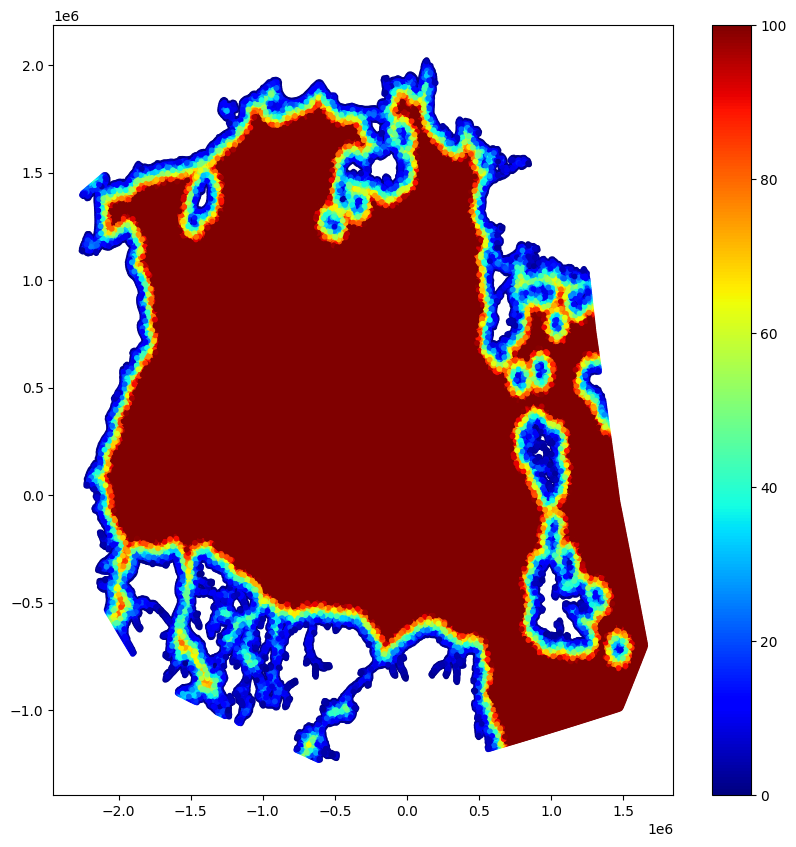

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(d['x'], d['y'], 10, dist_mesh, vmin=0, vmax=100, cmap='jet')
plt.colorbar()